In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<font size=4>
&emsp;&emsp;考虑到线性回归的表示能力有限，可能出现欠拟合现象。局部加权线性回归为**每一个待预测的点**都构建一个加权的线性模型。其加权的方式是根据预测点与数据集中点的距离来为数据集中的点赋权，当某点距离预测点较远时，其权重较小，反之权重较大。由于这种权重的机制的引入使得局部加权线性回归产生了一种局部分段拟合的效果。由于该方法对于每一个预测点构建一个加权线性模型，都要重新计算与数据集中所有点的距离来确定权重值，进而确定针对该预测点的线性模型，计算成本高，同时为了实现无参数估计来计算权重，需要存储整个数据集。
</font>

# Locally Weighted Linear Regression

<font size=4>
**In the original linear regression algorithm,** to make a prediction at a query point x (i.e., to evaluate h(x)), we would:  
1. Fit $\theta$ to minimize ${\sum}_i(y^{(i)}-{\theta}^Tx^{(i)})^2$  
2. Output ${\theta}^Tx$  
</font>

<font size=4>
**In contrast,** the locally weighted linear regression algorithm does the following:  
1. Fit ${\theta}$ to minimize ${\sum}_iw^{(i)}(y^{(i)}-{\theta}^Tx^{(i)})^2$  
2. Output ${\theta}^Tx$  
</font>

<font size=4>
&emsp;&emsp;Intuitively, if $w^{(i)}$ is **large** for a particular value of i, then in picking ${\theta}$, we'll try hard to make $(y^{(i)}-{\theta}^Tx^{(i)})^2$ small. If $w^{(i)}$ is **small**, then the $(y^{(i)}-{\theta}^Tx^{(i)})^2$ error term will be pretty much ignored in the fit.
</font>

<font size=4>
&emsp;&emsp;A fairly standard choice for the weights is 
$$w^{(i)}=exp(-\frac{(x^{(i)}-x)^2}{2{\tau}^2})$$
</font>

<font size=4>
&emsp;&emsp;Note that the weights depend on the particular point x at which we're trying to evaluate x. Moreover, if $\left| \,x^{(i)}-x \, \right|$ is **small**, then $w^{(i)}$ is close to 1; and if $\left| \,x^{(i)}-x \, \right|$ is **large**, then $w^{(i)}$ is close to 0. Hence, ${\theta}$ is chosen giving a much higher "weight" to the (errors on) training examples close to the query point x.  
&emsp;&emsp;也就是说，权重$w^{(i)}$的取值与$x^{(i)}$和x的距离有关。如果$x^{(i)}$和x的距离越近，则权重越大；如果$x^{(i)}$和x的距离越远，则权重越小。权重$w^{(i)}$的取值在0～1之间。
</font>

<font size=4>
&emsp;&emsp;Note also that while the formula for the weights takes a form that is cosmetically similar to the density of a Gaussian distribution, the $w^{(i)}$'s do not directly have anything to do with Gaussians, and in particulat the $w^{(i)}$ are not ramdom variables, normally distributed or therwise.
</font>

<font size=4>
&emsp;&emsp;The parameter $\tau$ controls how quickly the weight of a trainging example falls off with distance of its $x^{(i)}$ from the query point x; $\tau$ is called **bandwidth** parameter.
</font>

<font size=4>
&emsp;&emsp;Locally weighted linear regression is a **non-parametric algorithm**.  
&emsp;&emsp;The (unweighted) linear regression algorithm that we saw earlier is known as a **parametric learning algorithm**, because it has a fixed, finite number of parameters (the $\theta$'s), which are fit to the data. Once we've fit the $\theta$'s and stored them away, we no longer need to keep the training data around to make future predictions.  
&emsp;&emsp;In contrast, to make predictions using locally weighted linear regression, we need to keep the entire training set around. The term "non-parametric" (roughly) refers to the fact that the amount of stuff we need to keep in order to represent the hypothesis h grows linearly with the size of the trainging set.
</font>

## 1. 加载数据

In [2]:
data = pd.read_csv('./data/ex0.txt', names=['x0','x1','y'], sep='\t')
data.head()

,x0,x1,y
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095
3,1.0,0.738336,4.256571
4,1.0,0.981083,4.560815


In [3]:
def loadData(path):
    data = pd.read_csv('./data/ex0.txt', names=['x0','x1','y'], sep='\t')
    X = data.iloc[:, :-1].as_matrix()
    y = data.iloc[:, -1].as_matrix().reshape(-1, 1)
    return X, y

In [4]:
X, y = loadData('./data/ex0.txt')
X.shape, y.shape

((200, 2), (200, 1))

## 2. 数据可视化

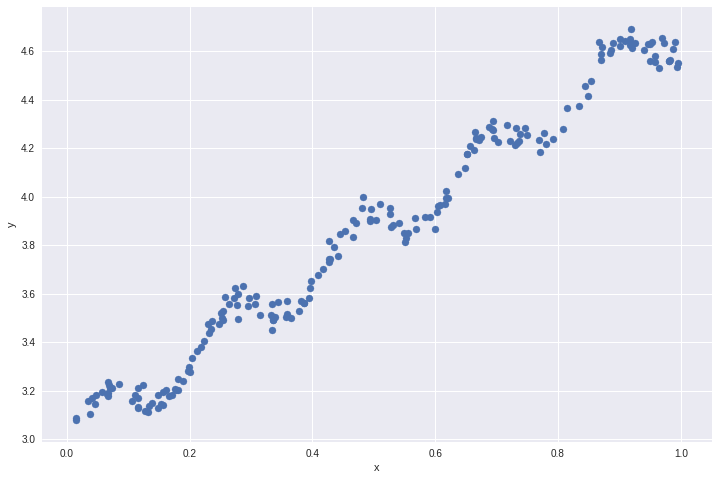

In [5]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 1], y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 3. 推导公式

<font size=4>
&emsp;&emsp;给定一个预测点x，局部加权线性回归的cost function为:
$$J(\theta)=\frac{1}{2}\sum^{m}_{i=1}w^{(i)}(y^{(i)}-{\theta}^{T}x^{(i)})^2$$
&emsp;&emsp;将其表示为矩阵形式:
$$J(\theta)=\frac{1}{2}(\vec{y}-X\theta)^TW(\vec{y}-X\theta)$$
&emsp;&emsp;其中，W是m×m的对角矩阵，主对角线上的元素为$w^{(i)}$，对应由每个样本$x^{(i)}$和预测点 x 计算得到的权重( i = 1,2,...,m )。注意到，$\frac{1}{2}(\vec{y}-X\theta)^TW(\vec{y}-X\theta)$为二次型。因此，令$J(\theta)$对$\theta$求导等于0可得:
$$\frac{{\partial}J(\theta)}{{\partial}\theta}=-X^TW(\vec{y}-X\theta)=-X^TW\vec{y}+X^TWX\theta=0$$
&emsp;&emsp;可以解得$$\theta=(X^TWX)^{-1}X^TW\vec{y}$$

In [6]:
# 给定一个预测点x,计算一次拟合的参数
def lwlr(queryPoint, X, y, tau):
    m = X.shape[0]
    W = np.zeros((m, m))
    
    for i in range(m):
        W[i, i] = np.exp(-np.linalg.norm(X[i, :] - queryPoint) / (2 * tau ** 2))
    
    if np.linalg.det(X.T @ W @ X) == 0:
        print('XWX is a singular matrix')
        return
    
    theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
    
    return queryPoint @ theta 

In [7]:
# 对数据集中所有点进行预测
def lwlrTest(X, y, tau):
    m = X.shape[0]
    y_hat = np.zeros((m, 1))
    
    for i in range(m):
        y_hat[i,:] = lwlr(X[i, :], X, y, tau)
    return y_hat

## 4. 选取不同的$\tau$

<font size=4>
&emsp;&emsp;根据$\tau$的不同取值绘制不同的拟合曲线。
</font>

In [8]:
def plotlwlr(X, y, tau):
    y_hat = lwlrTest(X, y, tau)
    
    # 对数据点按序进行排列,记录排序后的索引
    sortIndex = np.argsort(X[:, 1])
    
    # 绘图
    plt.figure(figsize=(12, 8))
    plt.scatter(X[sortIndex][:, 1], y[sortIndex])
    plt.plot(X[sortIndex][:, 1], y_hat[sortIndex], color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

<font size=4>
&emsp;&emsp;当k=1时，如同将所有数据点视为等权重，模型效果与无权重的标准线性回归差不多。
</font>

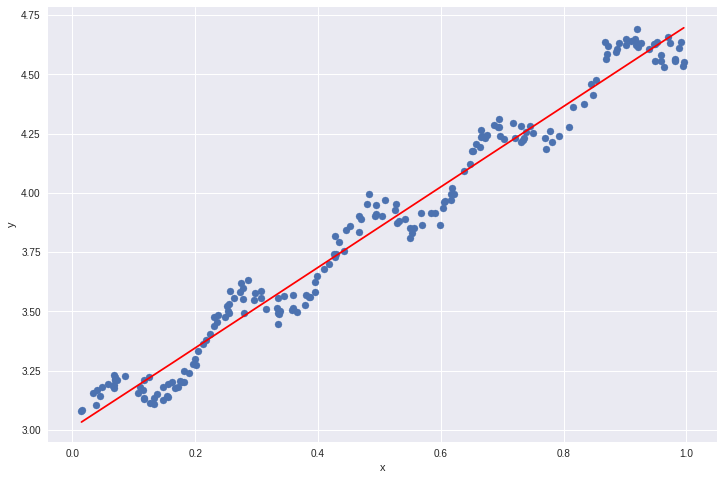

In [9]:
plotlwlr(X, y, 1)

<font size=4>
&emsp;&emsp;当k=0.1时，局部加权线性回归模型较好地反应了数据的潜在规律。
</font>

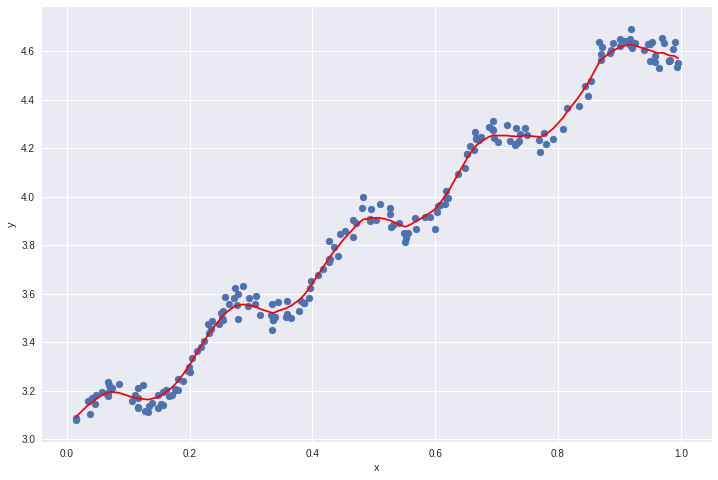

In [10]:
plotlwlr(X, y, 0.1)

<font size=4>
&emsp;&emsp;当k=0.03时，拟合的数据较多地考虑了噪声数据，出现了过拟合现象。
</font>

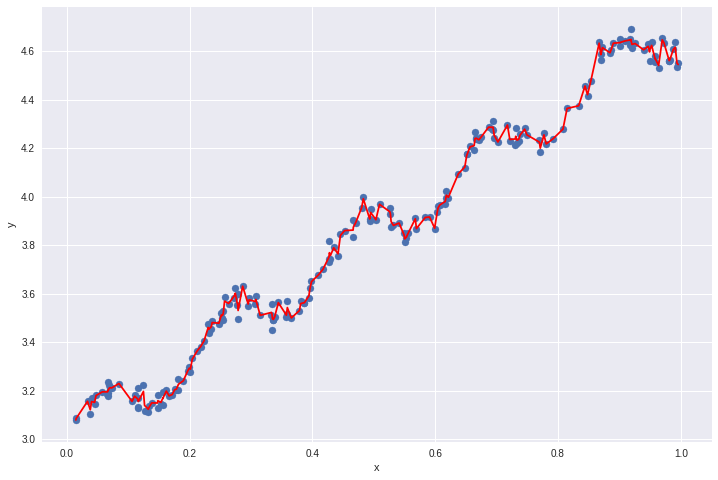

In [11]:
plotlwlr(X, y, 0.03)